# Transformada del Coseno DCT - Compresión Jpeg<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# Implementando Compresión de Datos JPEG en Python

## Tabla de Contenido
* [Introducción](#Introducción)
* [Python Implementación](#Implementación)
* [Aplicando Filtros](#Applying)

<a id="Introducción"></a>
## Introducción

En la era del big data, la compresión de datos es muy importante para ahorrar espacio sin perder mucha información. Existen diferentes formas de comprimir datos, especialmente imágenes. Algunos de ellos son sin pérdida en los que no se pierde información cuando se comprime. Sin embargo, algunos otros tienen pérdida en los que se pierden algunos datos.

En esta tarea, vamos a implementar y aplicar una forma de comprimir imágenes. Esto utiliza transformadas discretas de Fourier (DCT). Aunque es un tipo de compresión con pérdida, no se pierde mucha información ya que las imágenes originales y recuperadas no suelen distinguirse. Sin embargo, se ahorra mucho espacio al utilizar este método de compresión. Son varios los pasos que se realizan para aplicarlo. Estos son:
* Imagen dividida en bloques de 8x8 píxeles
* DCT aplicado para cada bloque
* Luego, cada bloque se cuantifica mediante alguna matriz de cuantificación.
* Luego, se aplana en forma de zigzag.
* Luego, todos los coeficientes DCT distintos de cero se codifican en algunos bits binarios utilizando una tabla de codificación.

Finalmente, la serie de bits resultantes se almacena en un disco. Luego, la imagen se puede descomprimir siguiendo los pasos en orden inverso.

Aquí, vamos a calcular la relación de compresión de algunas imágenes determinadas. Es decir, vamos a ver cuánto se comprimen las imágenes.

<a id="Implementación"></a>
## Python Implementación

Importemos primero las clases comunes.

In [264]:
import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline

from PIL import Image
import math
from math import gcd
import cmath
import time
import csv
from numpy import binary_repr

In [265]:
class Images(object):
    """
    La clase Imágenes implementa los métodos relacionados con las imágenes.
    Estos se utilizarán en todos los métodos de transformación.
    """

    def __init__():
        pass

    @classmethod
    def generateBlackAndWhiteSquareImage(self, imgSize):
        """
       Genera una imagen en blanco y negro de tamaño cuadrado con un tamaño de entrada determinado.

        Parámetros
        ----------
        imgTamaño: int
            Número de entrada que almacena la dimensión de la imagen cuadrada que se generará.

        Devoluciones
        -------
        imagen: ndarray
            La imagen cuadrada en blanco y negro generada.
        """

        #Crear una matriz con un tamaño determinado donde todos los valores almacenados sean solo ceros (para inicialización)
        imge = np.zeros([imgSize, imgSize], dtype=int)

        #Starting and ending indices of the white part of the image.
        ind1 = imgSize / 4
        ind2 = ind1 + (imgSize / 2)

        #Make a part of the image as white (255)
        imge[ind1:ind2, ind1:ind2] = (np.ones([imgSize / 2, imgSize / 2], dtype=int) * 255)

        #return the resulting image
        return imge

    @classmethod
    def generateImagesWithResizedWhite(self, imge):
        """
        Generates images with the same size as the original but with a resized white part of them.
        """

        N = imge.shape[0]

        imges = []
        i = N / 2
        while i >= 4:
            j = (N - i) / 2

            #Starting and ending indices for the white part.
            indx1 = j
            indx2 = j + i

            #Draw the image.
            imgeNew = np.zeros([N, N], dtype=int)
            imgeNew[indx1:indx2, indx1:indx2] = np.ones([i, i], dtype=int) * 255

            #Add the image to the list.
            imges.append(imgeNew)

            i = i / 2

        return imges

    @classmethod
    def resizeImage(self, imge, newSize):
        """
        Reduce el tamaño de la imagen dada.

        Parámetros
        ----------
        imagen: ndarray
            Matriz de entrada que almacena la imagen cuyo tamaño se va a cambiar.

        Devoluciones
        -------
        nuevoTamaño: int
            El tamaño de la imagen recién generada.
        """

        #Calcule el tamaño de la imagen original (en este caso, solo el número de filas, ya que es cuadrado)
        N = imge.shape[0]

        #The ratio of the original image as compared to the new one.
        stepSize = N / newSize

        #Creating a new matrix (image) with a black color (values of zero)
        newImge = np.zeros([N / stepSize, N / stepSize])

        #Average the adjacent four pixel values to compute the new intensity value for the new image.
        for i in range(0, N, stepSize):
            for j in range(0, N, stepSize):
                newImge[i / stepSize, j / stepSize] = np.mean(imge[i:i + stepSize, j:j + stepSize])

        #Return the new image
        return newImge

    @classmethod
    def generateImages(self, imgSizes=[128, 64, 32, 16, 8]):
        """Generates black and white images with different sizes.
        """
        #Create an empty list of images to save the generated images with different sizes.
        images = []

        #Generate the first and biggest image
        imge = Images.generateBlackAndWhiteSquareImage(imgSizes[0])

        #Add to the images list
        images.append(imge)

        #Generate the resized and smaller images with different sizes.
        for i in range(1, len(imgSizes)):
            size = imgSizes[i]
            images.append(Images.resizeImage(imge, size))

        return images


In [282]:
class DCT(object):
    """
    Esta clase DCT implementa todos los procedimientos para transformar una imagen digital 2D determinada.
     en su correspondiente imagen en el dominio de la frecuencia (Transformación DCT directa)
    """

    def __init__():
        pass

    @classmethod
    def __computeSinglePoint2DCT(self, imge, u, v, N):
        """
       Un método privado que calcula un valor único de 2D-DCT a partir de una imagen determinada.

        Parámetros
        ----------
        imagen: ndarray
            La imagen de entrada.
        
        tu: ndarray
            El índice en la dimensión x.
            
        v: ndarray
            El índice en la dimensión y.

        norte: entero
            Tamaño de la imagen.
            
        Devoluciones
        -------
        resultado: flotar
            El valor único calculado de la DCT.
        """
        result = 0

        for x in range(N):
            for y in range(N):
                result += imge[x, y] * math.cos(((2*x + 1)*u*math.pi)/(2*N)) * math.cos(((2*y + 1)*v*math.pi)/(2*N))

        #Add the tau value to the result
        if (u==0) and (v==0):
            result = result/N
        elif (u==0) or (v==0):
            result = (math.sqrt(2.0)*result)/N
        else:
            result = (2.0*result)/N

        return result

    @classmethod
    def __computeSinglePointInverse2DCT(self, imge, x, y, N):
        """
       Un método privado que calcula un valor único de 2D-DCT a partir de una imagen determinada.

        Parámetros
        ----------
        imagen: ndarray
            La imagen de entrada.
        
        tu: ndarray
            El índice en la dimensión x.
            
        v: ndarray
            El índice en la dimensión y.

        norte: entero
            Tamaño de la imagen.
            
        Devoluciones
        -------
        resultado: flotar
            El valor único calculado de la DCT.
        """
        result = 0

        for u in range(N):
            for v in range(N):
                if (u==0) and (v==0):
                    tau = 1.0/N
                elif (u==0) or (v==0):
                    tau = math.sqrt(2.0)/N
                else:
                    tau = 2.0/N
                result += tau * imge[u, v] * math.cos(((2*x + 1)*u*math.pi)/(2*N)) * math.cos(((2*y + 1)*v*math.pi)/(2*N))

        return result

    @classmethod
    def computeForward2DDCT(self, imge):
        """
        Calcula/genera la DCT 2D de una imagen de entrada en el dominio espacial.

        Parámetros
        ----------
        imagen: ndarray
            La imagen de entrada que se va a transformar.

        Devoluciones
        -------
        final2DDFT: ndarray
            La imagen transformada.
        """

        # Assuming a square image
        N = imge.shape[0]
        final2DDCT = np.zeros([N, N], dtype=float)
        for u in range(N):
            for v in range(N):
                #Compute the DCT value for each cells/points in the resulting transformed image.
                final2DDCT[u, v] = DCT.__computeSinglePoint2DCT(imge, u, v, N)
        return final2DDCT

    @classmethod
    def computeInverse2DDCT(self, imge):
        """
        Calcula/genera la DCT 2D de una imagen de entrada en el dominio espacial.

        Parámetros
        ----------
        imagen: ndarray
            La imagen de entrada que se va a transformar.

        Devoluciones
        -------
        final2DDFT: ndarray
            La imagen transformada.
        """

        # Assuming a square image
        N = imge.shape[0]
        finalInverse2DDCT = np.zeros([N, N], dtype=float)
        for x in range(N):
            for y in range(N):
                #Compute the DCT value for each cells/points in the resulting transformed image.
                finalInverse2DDCT[x, y] = DCT.__computeSinglePointInverse2DCT(imge, x, y, N)
        return finalInverse2DDCT

    @classmethod
    def normalize2DDCTByLog(self, dctImge):
        """
       Calcula la transformación logarítmica de la imagen DCT transformada para hacer el rango
        de los valores DCT b/n 0 a 255
        
        Parámetros
        ----------
        Imagen dct: ndarray
            La imagen transformada DCT de entrada.

        Devoluciones
        -------
        dctNormImge: ndarray
            La versión normalizada de la imagen transformada.
        """

        #Normalize the DCT values of a transformed image:
        dctImge = np.absolute(dctImge)
        dctNormImge = (255/ math.log10(255)) * np.log10(1 + (255/(np.max(dctImge))*dctImge))

        return dctNormImge

In [267]:
def quantizeDCTImage(dctImge, Q):
    """Computes the quantized DCT image by dividing each 8x8 block
    of the DCT image by the quantization matrix."""
    
    N = dctImge.shape[0]
    blockN = Q.shape[0]
    qDctImge = np.zeros([N, N], dtype=int)
    for i in np.arange(0, N, 8):
        for j in np.arange(0, N, 8):
            qDctImge[i:(i+blockN), j:(j+blockN)] = (
                np.round(dctImge[i:(i+blockN), j:(j+blockN)]/Q))
    
    return qDctImge    

In [268]:
def constructZigzagArray(mat):
    """Constructs the flattened array from a given matrix by going in a zigzag fashion."""
    
    N = mat.shape[0]
    lstResult = []
    iPlus = False
    tPlus = True
    t = 0
    j = 1
    
    while True:
        if tPlus:
            if iPlus:
                for i in range(t+1):
                    lstResult.append(mat[i, t-i])
            else:
                for i in range(t, -1, -1):
                    lstResult.append(mat[i, t-i])
            t += 1
            iPlus = not iPlus

            if t == N:
                tPlus = not tPlus
        else:
            k = t-1
            if iPlus:
                for i in range(j, t):
                    lstResult.append(mat[i, k])
                    k -= 1
            else:
                for i in range(j, t):
                    lstResult.append(mat[k, i])
                    k -= 1
            j += 1
            iPlus = not iPlus
            if j>t:
                break
    return np.array(lstResult)

In [269]:
def findDCCodes(binDC, Codes):
    """Finds the category of the DC value"""
    baseCode = Codes[:, 1]
    l = len(binDC)
    indx = None
    subDC = None
    length = 0
    for i in range(l):
        subDC = binDC[:(i+1)]
        loc = np.nonzero(Codes[:, 1] == subDC)[0]
        if loc.size:
            indx = loc[0]
            length = int(Codes[indx, 2])
            break
    return indx, subDC, length       

In [270]:
def changeToHexDigit(num):
    if (num==10) or (num=='10'):
        return 'A'
    elif (num==11) or (num=='11'):
        return 'B'
    elif (num==12) or (num=='12'):
        return 'C'
    elif (num==13) or (num=='13'):
        return 'D'
    elif (num==14) or (num=='14'):
        return 'E'
    elif (num==15) or (num=='15'):
        return 'F'
    return str(num)

In [271]:
def computeDctJpegCompression(imge):
    """Computes the DCT JPEG Compression algorithm on a given image"""

    #Load the quantization matrix
    Q = np.loadtxt('JPEG_Code_Tables/Quantization_Matrix.txt', delimiter='\t', dtype=int)
    #AC_Codes = np.loadtxt('JPEG_Code_Tables/JPEG_AC_Codes.txt', delimiter='\t', dtype=str)

    #Load the JPEG DC Encodings
    DC_Codes = np.loadtxt('JPEG_Code_Tables/JPEG_DC_Codes.txt', delimiter='\t', dtype=str)

    #Load the JPEG AC Encodings
    AC_Codes = np.loadtxt('JPEG_Code_Tables/JPEG_AC_Codes.txt', delimiter='\t', dtype=str)

    #Variable to store the resulting codes.
    result = ''
    
    N = imge.shape[0]
    blockN = Q.shape[0]
    previousDC = None
    for i in np.arange(0, N, blockN):
        for j in np.arange(0, N, blockN):
            # 1. Extract one block of the image at a time.
            blockImge = imge[i:(i+blockN), j:(j+blockN)]
            
            # 2. Apply DCT to the block
            blockImgeDct = DCT.computeForward2DDCT(blockImge)
            
            # 3. Quantize the resulting DCT values (i.e., divide by Q matrix and round)
            blockImgeDctQ = (blockImgeDct/Q).astype(int)
            
            # 4.1. Flatten the quantized image by using zigzag fashion.
            blockImgeDctQFlat = constructZigzagArray(blockImgeDctQ)
            # 4.2. Trim the trailing zeros from the array
            blockImgeDctQFlat = np.trim_zeros(blockImgeDctQFlat, trim='b')
            #print blockImgeDctQFlat
            
            #Encode the DCT values (trailing zeros are deleted)
            #A. DC Codes
            if blockImgeDctQFlat.size == 0:
                DC = 0
            else:
                DC = blockImgeDctQFlat[0]
            if previousDC is None:
                previousDC = DC
            else:
                temp = previousDC
                DC -= previousDC
                previousDC = temp
            #Convert to binary
            if DC==0:
                binDC = '00'
            else:
                binDC = binary_repr(abs(DC))
            #Search in category and substring of binDC in DC Encodings
            indx, subDC, length = findDCCodes(binDC, DC_Codes)
            if DC < 0:
                #Flip 0's and 1's
                binDC = ''.join('1' if x == '0' else '0' for x in binDC)
            #print "binDC: ", binDC
            #print "subDC: ", subDC
            #print "length: ", length
            binDC = binDC.zfill(length-len(subDC))
            DC_Code = subDC + binDC
            result += DC_Code
            
            #B. AC Codes
            runs = 0
            for i in range(1, blockImgeDctQFlat.size):
                AC = blockImgeDctQFlat[i]
                if AC == 0:
                    runs += 1
                else:
                    binAC = binary_repr(abs(AC))
                    length = len(binAC)
                    
                    if runs > 15:
                        runs = 15
                    indx = AC_Codes[:, 0:2].tolist().index([str(changeToHexDigit(runs)), str(length)])
                    baseCode = AC_Codes[indx, 2]
                    length = int(AC_Codes[indx, 3])
                    if AC < 0:
                        #Flip 0's and 1's
                        binAC = ''.join('1' if x == '0' else '0' for x in binAC)
                    binAC = binAC.zfill(length-len(baseCode))
                    AC_Code = baseCode + binAC
                    result += AC_Code
                    runs = 0
            
            #Add EOB Code at the end of the encoded block.
            result += AC_Codes[0, 2]
            
    return result, len(result)
    

<a id="Applying"></a>
## Aplicando la Compresion

NÓTESE BIEN. En este ejemplo, sólo se aplica una matriz de cuantificación. Sin embargo, se puede cambiar a cualquier otra matriz. La matriz de cuantificación determina el nivel de compresión. En otras palabras, diferentes matrices de cuantificación dan diferentes imágenes comprimidas. Según, la calidad de las imágenes recuperadas también es diferente. Por lo general, cuanto mayor sea la relación de compresión para la misma imagen, menor será la calidad de la imagen recuperada/descomprimida.

In [281]:
#Load or generate images

#1. Generate an image with a white square at its center and black background.
imge = Image.open(r'Images/house.jpg')
#imge =   Images.generateBlackAndWhiteSquareImage(512)

#Load other images from file.
imgeHouse = Image.open(r'Images/house.jpg') # open an image
imgePepper = Image.open(r'Images/peppers_gray.jpg') # open an image

#Convert from 3-D to 2-D
imge = imgeHouse.convert(mode='L')
imgeHouse = imgeHouse.convert(mode='L')
imgePepper = imgePepper.convert(mode='L')

#Convert the image file to a matrix
imge = np.array(imge)
imgeHouse = np.array(imgeHouse)
imgePepper = np.array(imgePepper)

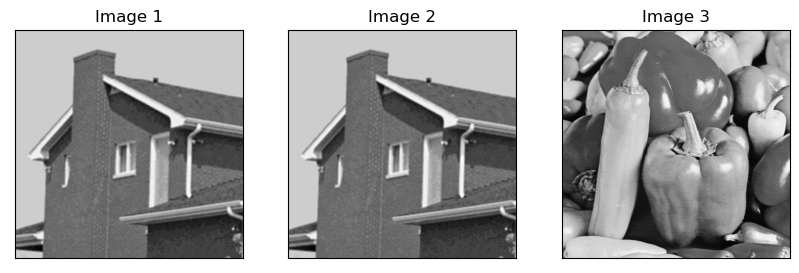

In [273]:
#Let's now display the images
fig, axarr = plt.subplots(1, 3, figsize=[10,5])

axarr[0].imshow(imge, cmap=plt.get_cmap('gray'))
axarr[0].set_title("Image 1")
axarr[0].axes.get_xaxis().set_visible(False)
axarr[0].axes.get_yaxis().set_visible(False)

axarr[1].imshow(imgeHouse, cmap=plt.get_cmap('gray'))
axarr[1].set_title("Image 2")
axarr[1].axes.get_xaxis().set_visible(False)
axarr[1].axes.get_yaxis().set_visible(False)

axarr[2].imshow(imgePepper, cmap=plt.get_cmap('gray'))
axarr[2].set_title("Image 3")
axarr[2].axes.get_xaxis().set_visible(False)
axarr[2].axes.get_yaxis().set_visible(False)


In [274]:
#Calculate the size of the images
N_imge = imge.shape[0]
N_Pepper = imgePepper.shape[0]
N_House = imgeHouse.shape[0]

In [275]:
#Calculate the uncompressed image size(For 8-bit grayscale image)
uncompSize_imge = (N_imge**2)*8
uncompSize_Pepper = (N_Pepper**2)*8
uncompSize_House = (N_House**2)*8

In [276]:
#Calculate the compressed images' size
_, compSize_imge = computeDctJpegCompression(imge)

In [277]:
_, compSize_Pepper = computeDctJpegCompression(imgePepper)

In [278]:
_, compSize_House = computeDctJpegCompression(imgeHouse)

In [279]:
#Calculate the compression ratio of the images
print("Imagen 1 Porcentaje de Compresion: ", int(uncompSize_imge/compSize_imge))
print ("Imagen 2 Porcntaje de Compresion: ", int(uncompSize_House/compSize_House))
print ("Imagen 3 Porcentaje de Compresion: ", int(uncompSize_Pepper/compSize_Pepper))

Imagen 1 Porcentaje de Compresion:  54
Imagen 2 Porcntaje de Compresion:  54
Imagen 3 Porcentaje de Compresion:  16


A partir de los resultados anteriores, las imágenes con una alta correlación tienen relaciones de compresión más altas que las de las imágenes sin correlación.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).